## Fun Project

In [171]:
import numpy as np
import cv2
import matplotlib.pyplot  as plt

In [152]:
img =cv2.imread("model/dataset/Faiq/1.jpg")
img.shape

(954, 960, 3)

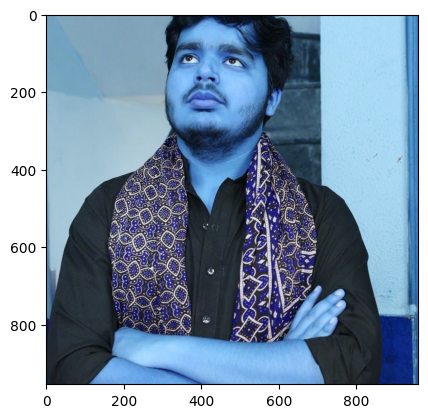

In [153]:
# showing omage
plt.imshow(img)

In [154]:
gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(954, 960)

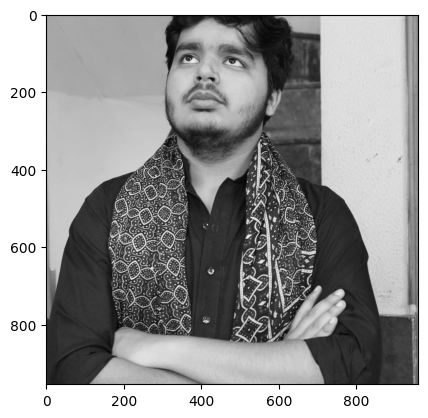

In [155]:
plt.imshow(gray, cmap="gray")

In [172]:
face_cascade =cv2.CascadeClassifier("model/opencv/haarcascades/haarcascade_frontalface_default.xml")
eyes_cascade =cv2.CascadeClassifier("model/opencv/haarcascades/haarcascade_eye.xml")


In [157]:
# x--> Starting of face
# y --> Ending of face
# w --> Width
# h --> Height
x, y, w, h =g[0]

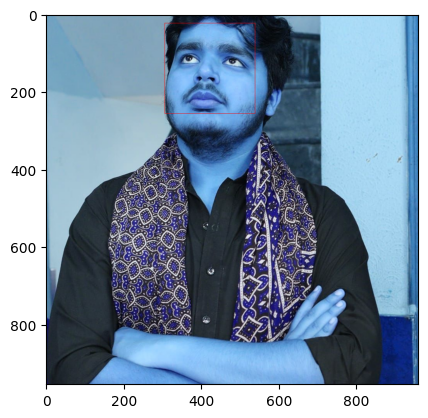

In [158]:
# drawing rectangle around face
ing =cv2.rectangle(img, (x, y), (x+w,y+h), (255, 0, 0), 1)
plt.imshow(ing)

4


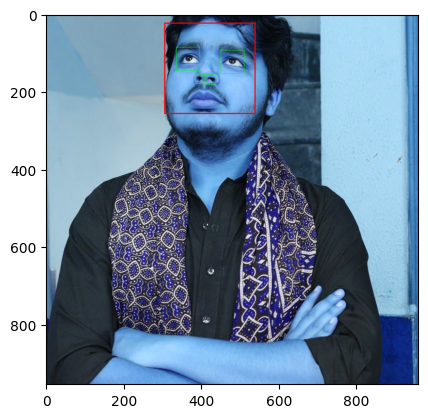

In [159]:
cv2.destroyAllWindows()
for (x, y, w, h) in g:
    face_img =cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_color =face_img[y:y+h, x:x+w]
    roi_gray =gray[y:y+h, x:x+w]
    eyes =eyes_cascade.detectMultiScale(roi_color)
    print(len(eyes))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0,255,0))

plt.imshow(img)
    

In [201]:
def get_cropped_image_if_two_eyes(path):
    img =cv2.imread(path)
   
    gray =cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    faces =face_cascade.detectMultiScale(gray, 1.3, 5)
    print(faces)
    l =[]
    for (x, y, w, h) in faces:

    
        roi_gray =gray[y:y+h, x:x+w]
        roi_color =img[y:y+h, x:x+w]
     
        eyes =eyes_cascade.detectMultiScale(roi_gray)
   
        l.append([roi_color])
    return l

In [211]:
l =get_cropped_image_if_two_eyes("./model/dataset/Faiq/9.jpg")

l[2][0].shape


[[813 207 179 179]
 [176 230 173 173]
 [455 268 170 170]]


(170, 170, 3)

In [215]:
path ="model/dataset/"
import os
img_dirs =[]
for i in os.scandir(path):
    if i.is_dir():
        img_dirs.append(i.path)
img_dirs

['model/dataset/Faiq', 'model/dataset/Rauf']

In [217]:
os.mkdir("./model/dataset/cropped")

In [223]:

for j in img_dirs:
    count =0
    for i in os.scandir(j):
        l =get_cropped_image_if_two_eyes(i)
        if len(l)!=0:
            for k in l:
                if not os.path.exists("./model/dataset/cropped/" + j.split("/")[-1]):
                    os.mkdir("./model/dataset/cropped/" + j.split("/")[-1])
                img =str(count) + ".png"
            
                cv2.imwrite(f"./model/dataset/cropped/{j.split("/")[-1]}/" +img,k[0])
                count +=1






[[303  22 233 233]]
[[196  86 306 306]]
[[428 350 119 119]]
[[393 141 138 138]]
[[519 124 156 156]
 [257 142 153 153]]
[[503 274 134 134]
 [274 308 134 134]]
[[300 340  85  85]
 [642 368  79  79]
 [452 415  62  62]
 [299 848  97  97]]
[[138 288 107 107]
 [270 373  80  80]]
[[210 372 335 335]]
[[153 315 187 187]]
[[ 84 405 319 319]
 [458 604 255 255]]
[[808 208 322 322]]
[[ 75 385 327 327]
 [424 671 212 212]]
[[136 342 349 349]]
[[532 187 109 109]]
[[261 198 132 132]
 [535 221 130 130]
 [434 786  89  89]]
[[241 214 132 132]
 [410 790 107 107]
 [516 230 131 131]]
[[259 197 134 134]
 [534 222 128 128]
 [434 786  89  89]]
[[537 721  54  54]
 [161 197 201 201]
 [366 278 331 331]]
()
[[186 422 482 482]]
()
[[415 333 824 824]]
[[344  23 193 193]]
[[375  87 258 258]]
[[ 32 486 365 365]
 [514 619 354 354]]
[[162 212 367 367]]
[[813 207 179 179]
 [176 230 173 173]
 [455 268 170 170]]
[[196 423 286 286]]
[[338 251 248 248]]
[[289 307 224 224]]
[[290 124 369 369]]
[[317  73 290 290]]
[[208 293 370

## Feature Engineering